In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


### Exploratory data analysis

In [2]:
data = 'spotify-2023.csv'

df = pd.read_csv(data,encoding='ISO-8859-1')
df.shape

(953, 24)

### Preview the dataset

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
len(df['track_name'].unique())

943

In [5]:
len(df['streams'].unique())

949

943/953 unique values => it is approximately a unique identifier for each of the instance => we can drop it. Same for streams attribute with 949/953

In [6]:
df.drop(['track_name', 'streams'], axis=1, inplace=True)

In [7]:
df.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,"Latto, Jung Kook",2,2023,7,14,553,147,43,263,45,...,125,B,Major,80,89,83,31,0,8,4
1,Myke Towers,1,2023,3,23,1474,48,48,126,58,...,92,C#,Major,71,61,74,7,0,10,4
2,Olivia Rodrigo,1,2023,6,30,1397,113,94,207,91,...,138,F,Major,51,32,53,17,0,31,6
3,Taylor Swift,1,2019,8,23,7858,100,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
4,Bad Bunny,1,2023,5,18,3133,50,84,133,87,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   in_apple_playlists    953 non-null    int64 
 8   in_apple_charts       953 non-null    int64 
 9   in_deezer_playlists   953 non-null    object
 10  in_deezer_charts      953 non-null    int64 
 11  in_shazam_charts      903 non-null    object
 12  bpm                   953 non-null    int64 
 13  key                   858 non-null    object
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

### There are 5 non-numeric column Lets convert it into integer equivalent

In [11]:
X = df
y = df['artist(s)_name']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['artist(s)_name'] = le.fit_transform(X['artist(s)_name'])

y = le.transform(y)

In [13]:
y = df['in_deezer_playlists']
X['in_deezer_playlists'] = le.fit_transform(X['in_deezer_playlists'])

y = le.transform(y)

In [14]:
y = df['in_shazam_charts']
X['in_shazam_charts'] = le.fit_transform(X['in_shazam_charts'])

y = le.transform(y)

In [15]:
y = df['key']
X['key'] = le.fit_transform(X['key'])

y = le.transform(y)

In [16]:
y = df['mode']
X['mode'] = le.fit_transform(X['mode'])

y = le.transform(y)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist(s)_name        953 non-null    int32
 1   artist_count          953 non-null    int64
 2   released_year         953 non-null    int64
 3   released_month        953 non-null    int64
 4   released_day          953 non-null    int64
 5   in_spotify_playlists  953 non-null    int64
 6   in_spotify_charts     953 non-null    int64
 7   in_apple_playlists    953 non-null    int64
 8   in_apple_charts       953 non-null    int64
 9   in_deezer_playlists   953 non-null    int32
 10  in_deezer_charts      953 non-null    int64
 11  in_shazam_charts      953 non-null    int32
 12  bpm                   953 non-null    int64
 13  key                   953 non-null    int32
 14  mode                  953 non-null    int32
 15  danceability_%        953 non-null    int64
 16  valence_

## Let's use elbow method to find optimal number of clusters

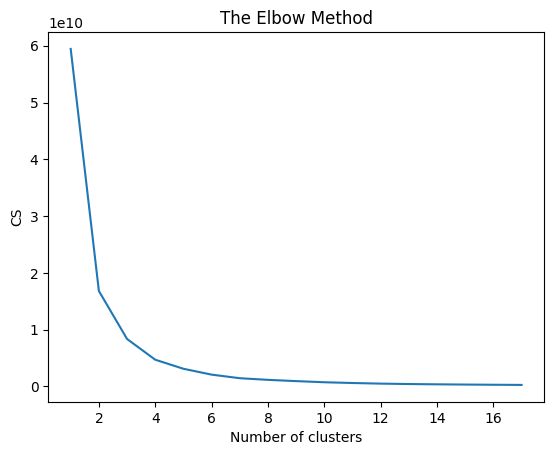

In [18]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 17, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 18), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By the above plot, we can see that there is a kink at k=2.

Hence k=2 can be considered a good number of the cluster to cluster this data.

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape

(953, 2)

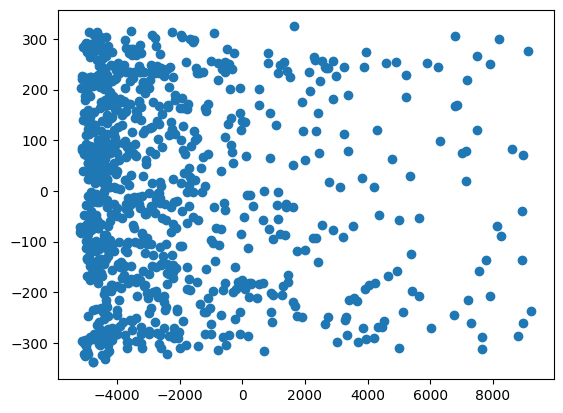

In [20]:
kmeans = KMeans(n_clusters= 2)
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

 Plot All K-Means Clusters

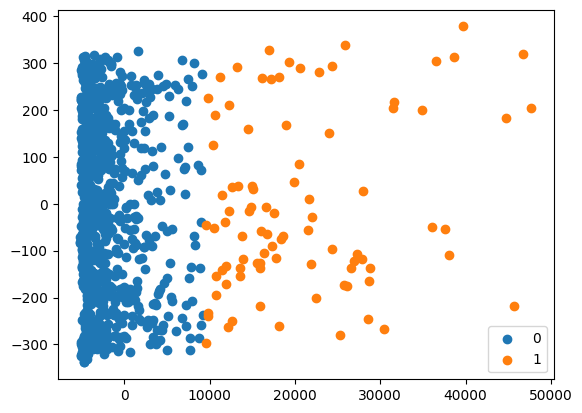

In [21]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

Plotting the Cluster Centroids

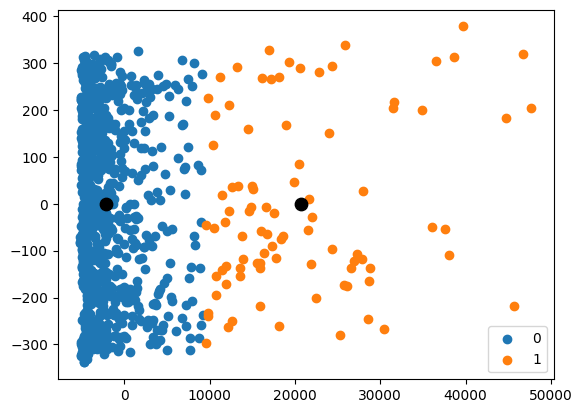

In [22]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [23]:
import plotly_express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
from sklearn.manifold import TSNE

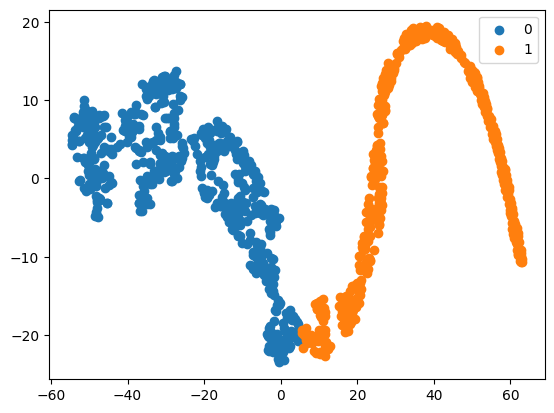

In [24]:
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(X)
kmeans_tsne = KMeans(n_clusters=2)
tsne_labels = kmeans_tsne.fit_predict(tsne_results)
unique_tsne_labels = np.unique(tsne_labels)

for i in unique_tsne_labels:
    plt.scatter(tsne_results[tsne_labels == i, 0], tsne_results[tsne_labels == i, 1], label=i)

plt.legend()
plt.show()